# *Project 1: K-nn Algorithm Introduction and Applications*

## Introduction

Welcome to an amazing project that digs into computer vision and picture categorization using the well-known MNIST dataset. The MNIST dataset contains 60,000 tagged images of handwritten digits ranging from 0 to 9. We will investigate the power of the k-Nearest Neighbors (k-NN) algorithm in picture classification in this project by creating a k-NN classifier from scratch using only Python and Numpy.

The k-NN algorithm works by identifying the K examples in a given training dataset that are the most similar to a new input instance and then categorizing the input instance based on the majority class of those K instances. In other words, the algorithm searches the training data for the nearest neighbors of the input instance and utilizes their classification to determine the classification of the input instance.

To illustrate the concept in its simplest form, we begin by placing a flag outside the door. Next, we observe the direction in which the flag is pointing, treating it (as our input). Finally, we refer to historical data on the relationship between the direction of the wind and the orientation of the flag (analogous to a training dataset) to classify the wind direction into categories such as northwest, southeast, or other directions(output).

In part 1, we will define a function knn_classifier(training_data, training_labels, x, n), training_data is a 2-dimensional Numpy array, training_labels is a 1-dimensional Numpy array with labels of the training data, x is a 1-dimensional Numpy array (the point we are going to predict) and n is an integer list which contains the number of neighbors to be used for classification.

Part 2 will examine the MINST Data using the K-Nearest Neighbors (K-NN) technique. The MINST Data is a well-known dataset of handwritten digits that is frequently used as a machine learning benchmark. The collection contains 60,000 images of digits ranging from 0 to 9, each 28x28 pixels in size. The K-NN algorithm is a form of supervised learning algorithm used for classification tasks.

### Import Python libraries

In [1]:
from pathlib import Path
import requests
import numpy as np
import gzip
import matplotlib.pyplot as plt
from statistics import mode
from sklearn.datasets import make_blobs

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Part 1. Implement the k-NN classification algorithm

Firstly, use `make_blobs(...)` to generate synthetic datasets for testing algorithms.

In [2]:
X, y = make_blobs(
    n_samples = 100,
    n_features = 2, 
    centers = 3, 
    cluster_std = 1, 
    random_state = 1
)


Firstly, define a function `knn_classifier(training_data, training_labels, x, n)` the inputs are: <br><br>
`training_data`: a  2-dimensional numpy array containing the training data, in this example `training_data =[[-7.94152277e-01,  2.10495117e+00], [-9.15155186e+00, -4.81286449e+00],...]] `.<br><br>
`training_labels`: a numpy array (1-dimension) with the labels associated with the training data, in this example, training_label is like `array([1,2,1,2,0,...])`.<br><br>
`x`: a numpy array (1-dimension), for example `x = [0,0]`.<br><br>
`n`: an integer indicating the number of nearest neighbors to take into account in the classification, for example, if you want to find 5 nearest neighbors then set `n = 5`.<br><br>
This function will return predicted_label and neighbors in the form `tuple(predicted_label,neighbors)`

In [3]:
def knn_classifier(training_data, training_labels, x, n): # Input data
    # Determine the Euclidean distance between each training and input point x.
    distance = np.sqrt(np.sum((training_data - x)**2, axis=1)) 
    # Sort the distances in ascending order and pick the first n nearest neighbors
    neighbors = np.argsort(distance)[:n]
    # Get the labels for the n nearest neighbors.
    labels = training_labels[neighbors]
    # Determine the modal (most prevalent) label among the neighbors.
    predicted_label = mode(labels)
    # Finally, return the final result
    return (predicted_label,neighbors)

Then, test if `knn_classifier()` function works

In [4]:
# Define the test point (the point we want to predict)
pred_pt = [-10,0] 
# Use the function to predict the label of the test point and get the n nearest neighbors
predicted_pt, neighbors = knn_classifier(X,y,pred_pt,10)
# Print out the result
print("Label of the predicted point is: {}".format(predicted_pt))
print("Neighbors are: {}".format(neighbors))

Label of the predicted point is: 1
Neighbors are: [57 79 11 82 88  3 64 56 81 70]


To use the code from the class notes for plotting the graph

In [5]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
def plot_clusters(X, y, p=None, p_label=None, neighbors=None):
    col_list = ['dodgerblue', 'limegreen', 'red', 'orange', 'fuchsia']
    colors = ListedColormap(col_list)
    norm = Normalize(0, len(col_list))

    plt.figure(figsize=(8, 8))
    with plt.style.context('seaborn'):
        scatter = plt.scatter(X[:, 0],
                              X[:, 1],
                              c=y,
                              s=90,
                              cmap=colors,
                              norm=norm,
                              label=y)
        if p is not None:
            p_col = "k" if p_label is None else colors(norm(p_label))
            plt.plot(p[0], p[1], marker="*", mfc=p_col, mec="k", ms=30, mew=2)
        if neighbors is not None:
            plt.scatter(X[neighbors, 0],
                        X[neighbors, 1],
                        edgecolors='black',
                        linewidth=3,
                        facecolors="None",
                        s=300)
        plt.legend(*scatter.legend_elements(),
                   markerscale=1.5,
                   prop={
                       "size": 12,
                       "weight": "normal"
                   })
    plt.show()

Generate the graph by using `plot_clusters()` function, here `X` and `y` are the training data & labels, `p = 'two-dimensional array representing a test point'`, `p_label = 'the label for the test data point p'`, `neighbors = 'the n nearest neighbors'`.

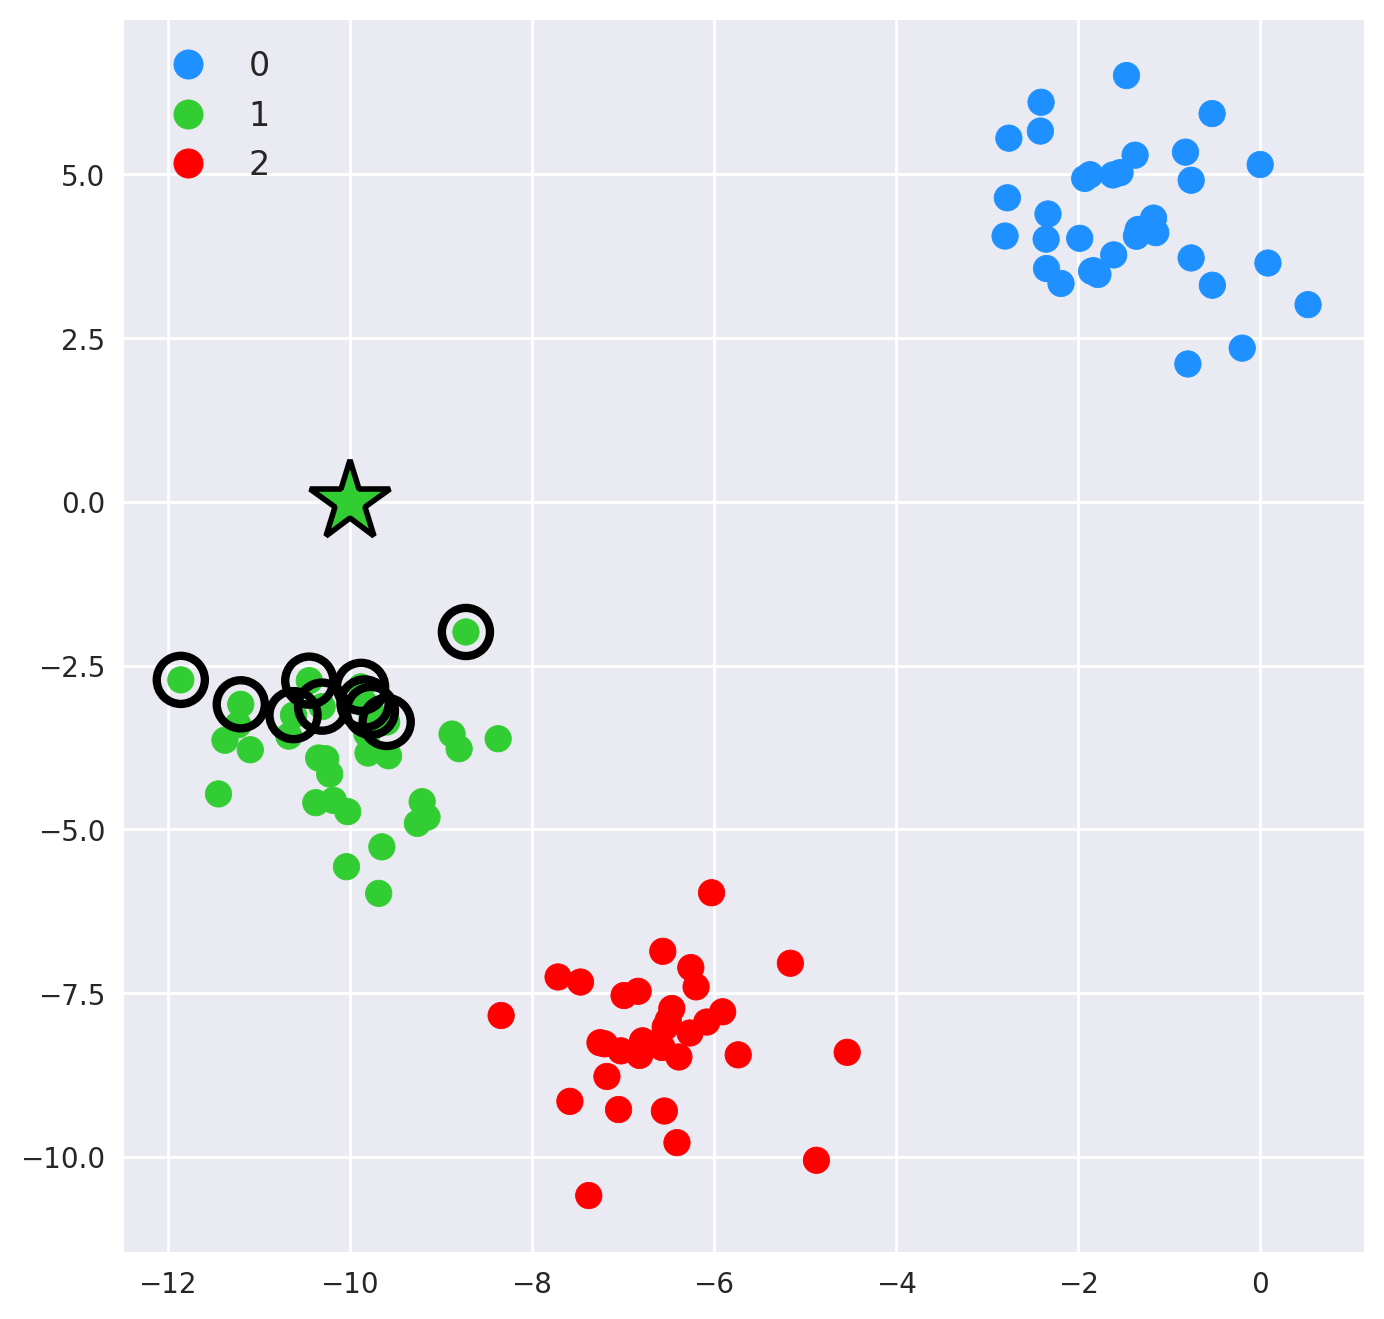

In [6]:
plot_clusters(X,y,p = pred_pt,p_label=predicted_pt,neighbors=neighbors)

We can easily confirm that this function works properly by examining the graph.

## Part 2. Apply the kNN classifier to the MNIST image dataset

This function `get_MNIST()`, which downloads and returns the MNIST dataset.

In [7]:
def get_MNIST():
  # Set url for MNIST dataset
  mnist_url = "http://yann.lecun.com/exdb/mnist/"
  img_file = "train-images-idx3-ubyte.gz"
  labels_file = "train-labels-idx1-ubyte.gz"
  
  # Check if MNIST files exist, download if they don't exist
  for fname in [img_file, labels_file]:
    if Path(fname).is_file() :
        print(f"Found: {fname}")
        continue
    print(f"Downloading: {fname}")
    r = requests.get(mnist_url + fname)
    with open(fname, 'wb') as foo:
        foo.write(r.content)
  # Read image and label data and store them into value f and e 
  with gzip.open("train-images-idx3-ubyte.gz", 'rb') as foo:
        f = foo.read()
  with gzip.open("train-labels-idx1-ubyte.gz", 'rb') as eoo:
        e = eoo.read()
  # Convert image data to array and reshape into 28x28 pixels
  images = np.array([b for b in f[16:]]).reshape(-1, 28*28) 
  # Store label data

  labels = [b for b in e[8:]] 
  # Return image and label data as a tuple

  return images, labels

In [8]:
content = get_MNIST() # Run the get_MNIST() function to get the data from http://yann.lecun.com/exdb/mnist/ website

Found: train-images-idx3-ubyte.gz
Found: train-labels-idx1-ubyte.gz


In [9]:
# After we downloaded the training data and labels, split training data and test data into 50000:10000
X_train = content[0][:50000]
y_train = content[1][:50000]
X_test = content[0][50000:]
y_test = content[1][50000:]

#### Then we need to introduce two brand new models for implementing the following steps:<br>

The `KNeighborsClassifier` is a supervised classification algorithm belonging to `sklearn.neighbors` library . It operates by locating the k training examples closest to the new input and classifying the new data point using their labels. The value of k is a hyperparameter that can be changed to improve the performance of the model.

The `accuracy_score` is a function from the `sklearn.metrics` library used to evaluate the performance of a classification model. It computes the accuracy of the predicted labels compared to the actual labels, where accuracy is defined as the fraction of correct predictions out of the total number of predictions. The inputs to the function are the actual labels and predicted labels of the test data. It returns a value between 0 and 1, where a value of 1 indicates a perfect match between the predicted and actual labels.

In [10]:
# Import sklearn model 
# KNeighborsClassifier is a machine learning algorithm used for classification tasks
from sklearn.neighbors import KNeighborsClassifier
# accuracy_score is a function that computes the accuracy of a classifier's predictions
from sklearn.metrics import accuracy_score

### Part 2. (a) Check the relationship between k value and accuracy

When it comes to the k classifier, there may be a number of individuals who are curious about the exact definition of "k" and how variations in its value impact the results. To put it simply, imagine an expansive orchard with a diverse range of fruit trees - from apples to oranges and even lemons. Now, suppose we find ourselves standing in a particular location within the orchard without any indication of our whereabouts. In such a scenario, we would rely on the proximity of fruit trees around us to identify the type of orchard area we are currently situated in. The key question here is - how many fruit trees should we consider to make a reliable determination? The answer lies in the value of "k" which represents the number of nearby fruit trees that we ought to take into account. Thus, the value of "k" is crucial in enabling us to accurately classify our surroundings in the orchard.

This code defines a function `test_accuracy_k` that takes in a parameter k, as well as optional parameters training_data and training_labels which default to the training data and training labels for a classification task. This function will return the accuracy based on the k value.

In [11]:
# Calling the function test_accuracy_k(k) will take an integer k as input, return the accuracy of the prediction
def test_accuracy_k(k,training_data = X_train, training_labels = y_train): 
  # Create a K-Nearest Neighbors classifier object with k neighbors
  knn = KNeighborsClassifier(n_neighbors=k)
  # Fit the KNN classifier to the training data
  knn.fit(training_data, training_labels)
    
  y_pred = knn.predict(X_test)  # Generate predictions on the test data using the fitted classifier

  accuracy = accuracy_score(y_test, y_pred)   # Calculate the accuracy of the predictions
  print(f"Accuracy when k = {k}: {accuracy}",end="\r")   # Print the accuracy of the model for the specified k value

  return accuracy # Return the final value

<div class="alert alert-block alert-info">
<b>Note: The code cell below may take a considerable amount of time to complete. However, if you wish to save time generating the result, you can find the output provided below.</b> 
</div>

In [12]:
'''
Generated Data: 
k_lst = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]
accuracy_lst = [0.9712, 0.971, 0.9692, 0.9661, 0.9649, 0.9622, 0.9607, 0.9575, 0.9558, 0.9534, 0.9524, 0.9511, 0.95, 0.9499, 0.9485, 0.9476, 0.9472, 0.9473, 0.9471, 0.9458]
'''
# Initialize two empty lists to store the values of k and their corresponding accuracy scores
k_lst = []
accuracy_lst = []
print("Calculating ...", end = '\n')
# Loop through values of k from 1 to 100 with a step size of 5
for i in range(1,101,5):
    # Add the current value of k to the list of k values
    k_lst.append(i)

    # Calculate the accuracy of the KNN classifier for the current value of k and append it into accuracy_lst
    accuracy_lst.append(test_accuracy_k(i))
print("Done                         ")    # Print out the value

Calculating ...
Done                         


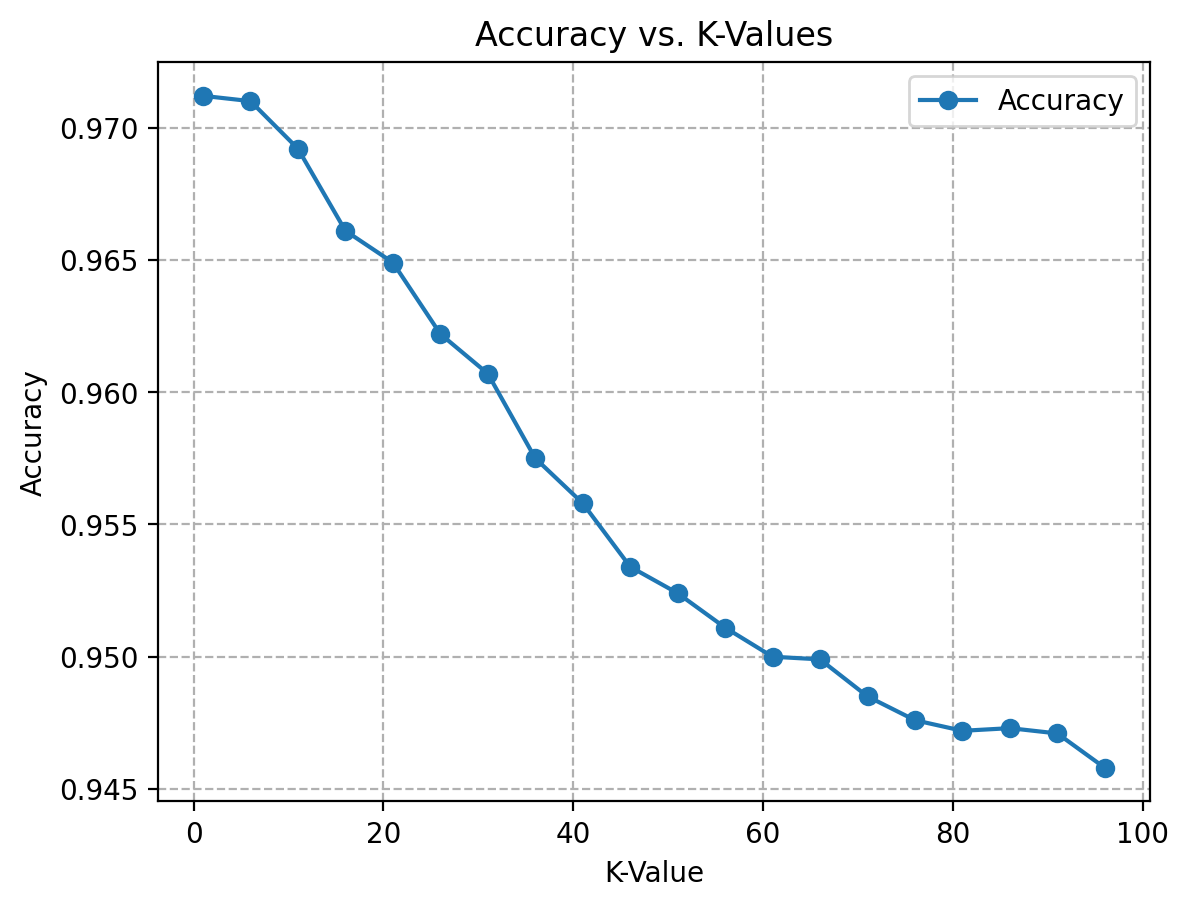

In [13]:
# Plot the graph
plt.plot(k_lst,accuracy_lst,"-o")
# Add titles
plt.title('Accuracy vs. K-Values')
# Add labels
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
# Add grid lines
plt.grid(True, linestyle='--')
# Add legend
plt.legend(['Accuracy'])
plt.show()

Based on the graph, we can see that as the value of k increases, the accuracy of the K-Nearest Neighbors classifier decreases. When k is 1, the greatest accuracy score is 0.9712, and as k increases to 96, the accuracy value lowers to 0.9458.<br>

This trend is clearly observed in the figure, where it can be seen that within the range of 1-100, as the value of k increases, the accuracy of the K-Nearest Neighbors classifier decreases gradually. This indicates that the model tends to overfit the training data when k is too small, and underfit it when k is too large.<br>

### Part 2. (b) Check the relationship between the size of the training set and accuracy

To determine if there is a relationship between the size of a dataset and prediction accuracy, as well as whether increasing the amount of training data leads to higher accuracy, we can conduct a test.

In [14]:
# Define a list of different training set sizes and k for K-Nearest Neighbors
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
n_neighbors = [1, 3, 5, 7, 9]
# Define empty lists to store the results
size_lst = []
accuracy_lst = []
# Loop through each combination of training set size and k value
for size in train_sizes:
    for k in n_neighbors:
        # Select a subset of the training data
        n_train = int(size * len(X_train))
        X_train_subset = X_train[:n_train]
        y_train_subset = y_train[:n_train]
        
        # Fit a K-Nearest Neighbors classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_subset, y_train_subset)
        
        # Append the current size and the accuracy score on the test set
        size_lst.append(size)
        accuracy_lst.append(knn.score(X_test, y_test))
        # Print the progress of the loop
        print("Calculating size = {}, when k = {}".format(size,k),end = "\r")
# Print a message to indicate that the loop has finished
print("Finished!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

Finished!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


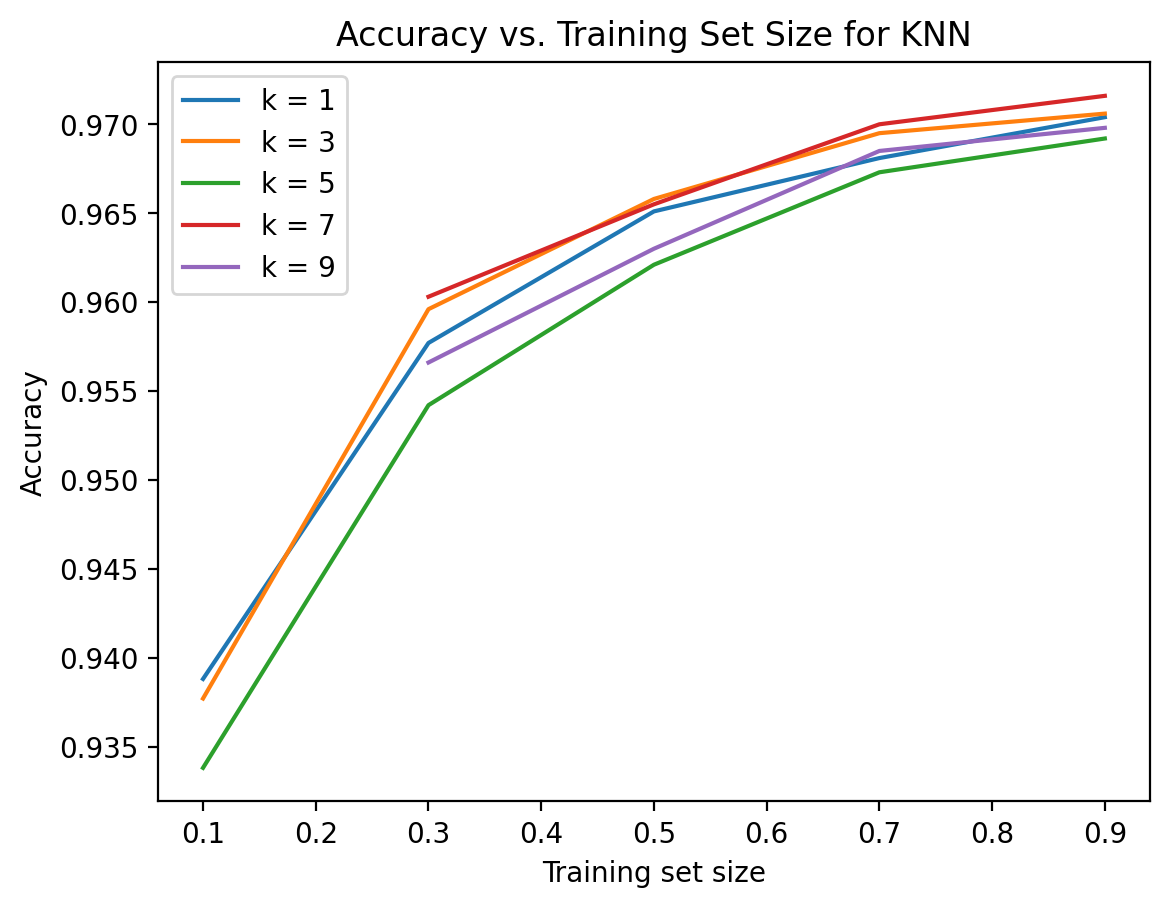

In [15]:
# Plot the graph
for k in n_neighbors:
    # Slice the size and accuracy lists for the current value of k
    sizes = size_lst[k-1::len(n_neighbors)]
    accuracies = accuracy_lst[k-1::len(n_neighbors)]
    # Plot the current values of sizes and accuracies with a label showing the current value of k
    plt.plot(sizes, accuracies, label='k = %d' % k)
# Add a title
plt.title('Accuracy vs. Training Set Size for KNN')
# Add labels and legend to the plot
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
# Display the final graph
plt.show()

Obviously, the graph generated by the code shows that as the training set size increases, the accuracy of the model increases as well. 

### Conclusion
As k grows from 1 to 96, the accuracy of the KNN classifier initially increases to a maximum of roughly 0.9712 at k=1. After that, the accuracy gradually declines as k grows. Also, we can get the greater the amount of data on which an algorithm is trained, the more probable it is to learn the underlying patterns and correlations in the data. This means that when presented with fresh, previously unseen data, the algorithm can generate more accurate predictions or classifications.<br>

There are some applications based on KNN classifier:<br>

Image Recognition:
kNN algorithm can also be used for image recognition. In image recognition, the kNN algorithm is used to classify images based on their similarity to a set of training images. The algorithm compares the features of the new image to the features of the training images and identifies the k most similar images. The algorithm then classifies the new image based on the majority class of the k most similar images.

Video Recognition:
The kNN algorithm can also be used for video recognition. In video recognition, the kNN algorithm is used to classify videos based on their similarity to a set of training videos. The algorithm compares the features of the new video to the features of the training videos and identifies the k most similar videos. The algorithm then classifies the new video based on the majority class of the k most similar videos.

In summary, based on my observations and understanding, the kNN classifier is well-suited for recognizing and classifying similar images and videos. To put it simply, it works by finding similarities between new and training data, and then sorting the training data mathematically to find the "most similar" examples. These examples are then used to classify the new data based on the majority label. The k value is used as a criterion to determine the "degree of similarity" and the number of neighbors to consider when making a classification decision.

### Bibliography/References

1. LeCun, Yann, Corinna Cortes, and Christopher J.C. Burges. "The MNIST Database of Handwritten Digits." 1998, http://yann.lecun.com/exdb/mnist/. Accessed 21 Feb. 2023.<br>
2. Brownlee, Jason. "How to Develop a Convolutional Neural Network From Scratch for MNIST Handwritten Digit Classification." Machine Learning Mastery, 8 Apr. 2019, https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/. Accessed 22 Feb. 2023.<br>
3. "sklearn.neighbors.KNeighborsClassifier." scikit-learn, version 1.4.1, 2022, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. Accessed 22 Feb. 2023.<br>
4. Class Notes. Accessed 15 Feb. 2023.
5. Neptune.ai. “KNN Algorithm Explanation: Opportunities & Limitations.” Neptune.ai, 8 Jan. 2021, https://neptune.ai/blog/knn-algorithm-explanation-opportunities-limitations. Accessed 23 Feb. 2023.
6. Stack Overflow. "How to measure the accuracy of Knn classifier in python?" Accessed February 23, 2023. https://stackoverflow.com/questions/15821116/how-to-measure-the-accuracy-of-knn-classifier-in-python.
7. Scikit-learn. "Nearest Neighbors." Accessed February 23, 2023. https://scikit-learn.org/stable/modules/neighbors.html.
8. Scikit-learn. "sklearn.neighbors.KNeighborsClassifier." Accessed February 23, 2023. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.